# datasets

In [82]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import PolynomialFeatures

def all_lower(L1):
    return [s.lower() for s in L1]

student_information = pd.read_csv("../dataset/student_information.csv")
student_information = student_information.set_index("itest_id")
columns_name_list = list(student_information.columns)

training_label = pd.read_csv("../dataset/anonymized_dataset_for_ADM2017/training_label.csv")
training_label.columns = all_lower(training_label.columns.tolist())
training_label = training_label.set_index("itest_id")
skillmatrix = pd.read_csv("../dataset/question_information.csv")

X = student_information.values
poly = PolynomialFeatures(2)
new_X = poly.fit_transform(X)
new_columns = poly.get_feature_names(columns_name_list)

new_frame = pd.DataFrame(data = new_X,index = student_information.index,columns = new_columns)

In [83]:
new_frame.head()

,1,aveknow,avecarelessness,avecorrect,numactions,averesbored,averesengcon,averesconf,averesfrust,averesofftask,...,averesconf^2,averesconf averesfrust,averesconf averesofftask,averesconf averesgaming,averesfrust^2,averesfrust averesofftask,averesfrust averesgaming,averesofftask^2,averesofftask averesgaming,averesgaming^2
itest_id,,,,,,,,,,,,,,,,,,,,,
8,1.0,0.352416,0.183276,0.483902,1056.0,0.208389,0.679126,0.115905,0.112408,0.156503,...,0.013434,0.013029,0.018140,0.022782,0.012636,0.017592,0.022095,0.024493,0.030762,0.038636
35,1.0,0.255164,0.158848,0.379658,993.0,0.222796,0.650079,0.069987,0.164347,0.153147,...,0.004898,0.011502,0.010718,0.016573,0.027010,0.025169,0.038917,0.023454,0.036265,0.056074
39,1.0,0.281693,0.152227,0.454545,418.0,0.274700,0.628075,0.116390,0.143827,0.221926,...,0.013547,0.016740,0.025830,0.002306,0.020686,0.031919,0.002850,0.049251,0.004398,0.000393
64,1.0,0.157938,0.098357,0.334038,1419.0,0.198394,0.670062,0.085895,0.132328,0.115773,...,0.007378,0.011366,0.009944,0.026063,0.017511,0.015320,0.040152,0.013403,0.035129,0.092067
77,1.0,0.191948,0.094195,0.413249,317.0,0.261455,0.638636,0.063971,0.129858,0.234331,...,0.004092,0.008307,0.014990,0.002885,0.016863,0.030430,0.005856,0.054911,0.010567,0.002034


In [92]:
train_frame = pd.merge(new_frame,training_label,how='inner')
train_frame.drop(['schoolid','mcas'], axis=1,inplace=True)  
# training_label = training_label[all_lower(['isSTEM'])]
train_frame.head()

,1,aveknow,avecarelessness,avecorrect,numactions,averesbored,averesengcon,averesconf,averesfrust,averesofftask,...,averesconf averesfrust,averesconf averesofftask,averesconf averesgaming,averesfrust^2,averesfrust averesofftask,averesfrust averesgaming,averesofftask^2,averesofftask averesgaming,averesgaming^2,isstem
0,1.0,0.191948,0.094195,0.413249,317.0,0.261455,0.638636,0.063971,0.129858,0.234331,...,0.008307,0.014990,0.002885,0.016863,0.030430,0.005856,0.054911,0.010567,0.002034,0
1,1.0,0.250838,0.111159,0.500000,406.0,0.273188,0.646944,0.104602,0.131632,0.230005,...,0.013769,0.024059,0.004208,0.017327,0.030276,0.005296,0.052902,0.009254,0.001619,0
2,1.0,0.259442,0.134564,0.500000,402.0,0.248153,0.638726,0.124143,0.128994,0.185285,...,0.016014,0.023002,0.010024,0.016639,0.023901,0.010415,0.034330,0.014960,0.006519,0
3,1.0,0.169165,0.086328,0.500000,112.0,0.302234,0.680432,0.040706,0.329814,0.436066,...,0.013425,0.017750,0.001156,0.108777,0.143821,0.009367,0.190153,0.012385,0.000807,0
4,1.0,0.181757,0.090678,0.500000,102.0,0.305196,0.611226,0.121713,0.075603,0.362513,...,0.009202,0.044122,0.000655,0.005716,0.027407,0.000407,0.131416,0.001951,0.000029,0


## logistic regression

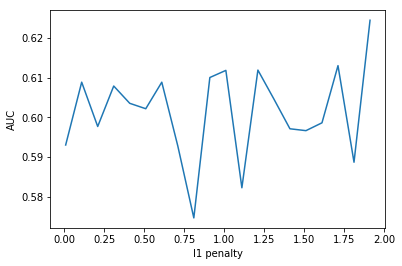

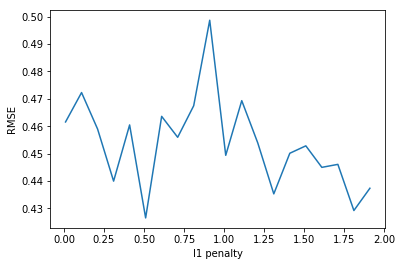

AUC:0.585076
RMSE:0.446442
[[ -8.47400391e-01   0.00000000e+00   0.00000000e+00   0.00000000e+00
    2.14526749e-04   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00  -4.32686238e-03   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   7.96665001e-03
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   1.96277411e+00   5.15243869e-03
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00  -6.77003818e-07  -2.09932214e-03
   -2.99188812e-03   1.50607168e-02   2.08194501e-04  -3.64673072e-03
    2.30192951e-03   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.000000

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn import metrics
import math


def logistic(df,k,l1):
    X=df.loc[:,new_columns]
    X1=X.values   
    y=df['isstem']
    y1=y.values  
    kf=KFold(k,shuffle=True)
    accurate=[]
    for train_index, test_index in kf.split(X1):
        X_train,X_test=X1[train_index],X1[test_index]
        y_train,y_test=y1[train_index],y1[test_index]
        log=LogisticRegression(C= l1, penalty="l1", dual=False)
        log.fit(X_train,y_train)
        pred = log.predict_proba(X_test)[:,1]
        fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
        AUC = metrics.auc(fpr, tpr)
        RMES = math.sqrt(metrics.mean_squared_error(y_test, pred))
        accurate.append(AUC)
    mean_acc=np.mean(accurate)
    return mean_acc , RMES ,log


l1_reg_c = np.arange(0.01, 2, 1e-1)
K_Forder = 4
df=train_frame
acc_list = []
l1_list =[]
RMSE_list = []
for l1_c in l1_reg_c:
    acc,RMSE, model = logistic(df,K_Forder,l1_c)
    acc_list.append(acc)
    l1_list.append(l1_c)
    RMSE_list.append(RMSE)
plt.xlabel("l1 penalty")
plt.ylabel("AUC")
plt.plot(l1_reg_c,acc_list)
plt.show()
plt.xlabel("l1 penalty")
plt.ylabel("RMSE")
plt.plot(l1_reg_c,RMSE_list)
plt.show()
l1_c = l1_list[acc_list.index(max(acc_list))]
acc, RMSE, model = logistic(df,K_Forder,l1_c)
print("AUC:%f" % acc)
print("RMSE:%f" % RMSE)
print(model.coef_)